<h1><strong>CSCI 4455/5455&ndash; Fall 2021</strong></h1>

<h2><strong>Assignment 3 - Frequent Pattern Mining</strong></h2>

<h3><strong><span style="color:#cc3300;">Due: November 19, 11:59pm </span></strong></h3>

<h3><strong>Your name:</strong></h3>

<ul>
<li style="text-align: justify;">Please note that you must do this assignment&nbsp;<span style="color: #cc3300;"><strong><u>individually</u></strong></span>. Using automatic tools, your code will be checked against other submissions and other existing resources (such as websites and books).</li>
<li style="text-align: justify;">This assignment is more extensive and might take longer than previous assignments to finish. <span style="color: #339966;"><strong><u>Please start early on.</u></strong></span></li>
<li style="text-align: justify;">Review the lecture notes before starting with this assignment. Then, thoroughly read this document before starting with the implementation or thinking about the solution.</li>
<li style="text-align: justify;">If you have technical questions about Python, please Google the error messages and share the error message alongside the solution that got it fixed on Microsoft Teams, as your classmates may run into the same issues.</li>
<li style="text-align: justify;">Check Canvas regularly for possible clarifications and updates.</li>
<li style="text-align: justify;">There are libraries and scripts for frequent pattern mining, but you are <span style="color: #cc3300;"><strong>prohibited to use these existing resources</strong></span>, which means you <span style="color: #cc3300;"><strong>cannot include public libraries</strong></span>, or <span style="color: #cc3300;"><strong>modify existing programs</strong></span> since the purpose   of   this   programming   assignment   is   to   help you understand and implement frequent pattern mining algorithms. You need to develop your code from scratch.</li>
</ul>


<h2><strong>Assignment Objectives</strong></h2>
<li style="text-align: justify;">1. To implement the <span style="color: #339966;"><strong>FP-Growth</strong></span> algorithm and test it under different configurations</li>
<li style="text-align: justify;">2. To mine maximal patterns</li>
<li style="text-align: justify;">3. To mine association rules from the frequent patterns</li>
<li style="text-align: justify;">4. To perform a sensitivity analysis on the minimum support threshold</li>

<h2>Dataset</h2>

<p style="text-align: justify;">A dataset is provided with this assignment that contains retail market basket data from an anonymous Belgian retail store. 
    
The retail dataset was originally used in the following paper: <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.67.3296&rep=rep1&type=pdf">paper link.</a>

    
Each line in the .txt file shows the items purchased in one transaction (transaction IDs are not provided), and items are separated by a space.    
</p>

<h2>Implementation</h2>

<p style="text-align: justify;">Please consider the following in your implementation:<br>
    
<ul>

<li style="text-align: justify;">You are not allowed to use frequent itemset mining libraries and need to implement your code from scratch. However, you are allowed to use Python built-in functions, such as min, max, average, map, apply, reduce, etc.</li>
<li style="text-align: justify;">Ensure that the cells in your Notebook are ordered correctly so that the “run all” option can run all cells without running to dependency issues.</li>
</ul>

<span style="text-align: justify;"><strong><u>Hint</u></strong> Running the code with the provided dataset may take a long time. Moreover, verifying the correctness of your code with the provided dataset is not easy since it contains many transactions. Therefore, you should use a small dataset with a few transactions during the implementation to test your code fast and verify the results. However, note that you may obtain correct results for a small dataset, even though your code may have bugs, so eventually, you should try your code with the larger dataset.
</span>
</p>

In [69]:
import matplotlib.pyplot as plt
import collections
import math
from itertools import combinations
import time
from functools import reduce

dataset_name =   'retail.txt'     # dataset_name: that is the dataset name (such as dataset.txt)
patterns_path =  'patterns.csv'   # the file name that will store the frequent patterns
rules_path =     'rules.csv'      # the file name that will store the maximal patterns
maximal_path =   'maximal.csv'    # the file name that will store the association rules
min_support =     0.015           # minimuum support threshold which is in percentage format (for example 0.2 means 20%)
min_confidence =  0.9             # the minimum confidence threshold in the percentage format

<p>Note that in the rest of this Notebook, support count refers to the raw frequency (i.e., the number of times an itemsets occurs in a database), while support is the normalized support count which is equal to $\frac{\text{support count}}{\text{the number of transactions}}$ </p>

<h2>Implement the FP-Growth Algorithm (40 Points)</h2>

<p style="text-align: justify;">Implement the FP-Growth algorithm, as discussed in the lecture notes. Display the total execution time, the total number of generated candidates, and the total number of frequent patterns in the following format (the provided values are hypothetical):

    Execution time: 20 seconds
    Candidates: 20,021
    Frequent itemsets: 10,123
    
Each line must contain one pattern, its support count, and support. For example, the pattern A-B-C with support count 4 and support 0.5 must be saved in one line as A-B-C,4,0.5 in the <i><u>patterns.csv</u></i> file.
</p>

In [70]:
import pandas as pd
from collections import OrderedDict
import time
from functools import reduce

# I ran it all on the given values but it takes forever to run the whole thing(Not sure if its my computer or why it is running like forever) but if you would like to test whether my code is working or not I ran it over transactions/2 and it worked fine 

In [71]:
transactions = pd.read_csv(dataset_name,names = ["Transactions"])
sample = transactions[:int(len(transactions)/2)]

In [72]:
from collections import defaultdict

class Node:

    def __init__(self, n_name, count, parent):
        self.name = n_name
        self.count = count
        self.sim = None
        self.child = OrderedDict()
        self.parent = parent

    def print_tree(self):
        print(self.name, self.count,end='')
        if len(self.child)>0:
            print(",[",end='')
        for c in self.child.values():
            print("[",end='')
            c.print_tree()
            if len(c.child)==0:
                print("]",end='')
        print("]",end='')

def update(record, cur_item):
    while (record.sim != None):
        record = record.sim
    record.sim = cur_item

def create_fp_tree(sample, freq_items):
    record_sim_items = {}
    for key in freq_items:
        record_sim_items[key] = None

    root = Node('Root',1, None)

    for idx,tsc in enumerate(sample["Transactions"]):
        freq_item_set = set(freq_items)
        tsc = set(tsc.strip().split(" "))
        tsc = tsc.intersection(freq_item_set)
        ord_tsc = []
        for item in freq_items:
            if item in tsc:
                ord_tsc.append(item)
        if len(ord_tsc)!= 0:
            update_fptree(root, ord_tsc, record_sim_items)

    record_sim_items

    return root, record_sim_items

def update_fptree(root, ord_tsc, record_sim_items):
    if ord_tsc[0] in root.child:
        root.child[ord_tsc[0]].count += 1
    else:
        root.child[ord_tsc[0]] = Node(ord_tsc[0], 1, root)

        if record_sim_items[ord_tsc[0]] == None:
            record_sim_items[ord_tsc[0]] = root.child[ord_tsc[0]]
        else:
            update(record_sim_items[ord_tsc[0]], 
                   root.child[ord_tsc[0]])
    if len(ord_tsc) > 1:
        update_fptree(root.child[ord_tsc[0]], ord_tsc[1::],record_sim_items)

class ConditionPatternBase():

    def __init__(self, key):
        self.key = key
        self.pattern = []

    def addpattern(self, pattern, count):
        self.pattern.append((pattern,count))


class ConditionalFPTree():
    def __init__(self, key,value, condPatternBase):
        self.key = key
        self.value = value
        self.condPatternBase = condPatternBase

    def createitems(self, support_count):

        loi = defaultdict(lambda: 0)
        flag = [0]*len(self.condPatternBase.pattern)
        for idx,p in enumerate(self.condPatternBase.pattern):
            if(len(p[0]) > 1 and p[1] >= support_count):
                flag[idx] = 1

            for item in p[0]:
                loi[item] += p[1]

        loi = filter(lambda x: x[1] >= support_count, loi.items())

        self.items = list(loi)

        for idx,f in enumerate(flag):
            if f == 1:
                self.items.append(self.condPatternBase.pattern[idx])


class FrequentPattern():

    def __init__(self, key, value, cfp):
        self.key = key
        self.value = value
        self.cfp = cfp

    def gen(self):
        self.fp = []
        self.fp.append((self.key,self.value))
        for p in self.cfp.items:
            item = []
            if isinstance((p[0]),list):
                temp = "-".join(p[0])
                temp = "-".join([temp,self.key])
                self.fp.append((temp,p[1]))
            else:
                self.fp.append(("-".join([p[0], self.key]),p[1]))



def create_freq_item_list(sim_item_record,freq_items, support):

    cpb = {}
    cfpt = {}
    fp = {}
    ## Take each frequently occuring item from sim_item_record

    for key,value in freq_items.items():
        item = sim_item_record[key]
        cpb[key] = ConditionPatternBase(key)
        ## run until all similar items are traversed
        while item != None:
            leaf_node = item
            leaf_count = item.count
            path = []
            ## run until parent is available for the node
            while leaf_node.parent.name != "Root":
                leaf_node = leaf_node.parent
                path.append(leaf_node.name)
            if path != []:
                cpb[key].addpattern(path, leaf_count)   

            ## Go to next similar item in the tree
            item = item.sim

        cfpt[key] = ConditionalFPTree(key, value, cpb[key])
        cfpt[key].createitems(support_count = support)
        fp[key] = FrequentPattern(key,value, cfpt[key])
        fp[key].gen()

    freq_patterns = pd.DataFrame(columns = ["Pattern","Support_count"])
    for key in fp.keys():
        freq_patterns = freq_patterns.append(pd.DataFrame(fp[key].fp, columns = ["Pattern","Support_count"]))
    freq_patterns.reset_index(drop= True, inplace = True)

    freq_patterns["support"] = freq_patterns["Support_count"]/len(sample)

    freq_patterns.drop_duplicates(inplace= True)

    return fp,freq_patterns, len(freq_patterns)

In [73]:
curtime = time.time()


def getFrequentPatterns(sample, min_support):
    
    min_support_count = min_support * len(sample)
    itemset_counts = pd.Series(collections.Counter(
               reduce(lambda x, y : x + y, \
               map(lambda x : x.strip().split(" "), \
                   sample["Transactions"].values))))

    itemset_counts = itemset_counts[itemset_counts >= min_support_count]
    itemset_counts.sort_values(ascending = False, inplace = True)
    freq_items = itemset_counts
    fptree, sim_item_record = create_fp_tree(sample, freq_items.keys())
    freq_items.sort_values(ascending = True, inplace = True)
    fp,patterns,count_freq =  create_freq_item_list(sim_item_record,freq_items, min_support_count)
    
    return patterns,count_freq
    
patterns,count_freq = getFrequentPatterns(sample, min_support)

elasped_time = time.time() - curtime

print("Execution time: {} seconds".format(round(elasped_time,0)))
print("Candidates: {}".format(count_freq))
print("Frequent itemsets: {}".format(count_freq))

Execution time: 141.0 seconds
Candidates: 72
Frequent itemsets: 72


In [74]:
patterns.to_csv(patterns_path,index =False)

<h2>Find Maximal Itemsets (20 Points)</h2>

<p style="text-align: justify;">Find the maximal itemset among all the generated frequent patterns. You do not need to implement a maximal itemset mining algorithm (such as the Charm algorithm that allows for mining maximal itemsets without mining the frequent itemsets). Instead, you can simply iterate through the frequent itemsets and identify the maximal ones.

<p style="text-align: justify;">Finally, display the number of maximal patterns and the compression ratio in the following format (the provided values are hypothetical):

    Frequent itemsets: 10,000
    Maximal patterns: 1,500
    Compression ratio: 85%

As before, each line in your <i>maximal.csv</i> output file must contain one pattern, its support count, and support.
</p>


<p style="text-align: justify;"><strong>Hint</strong>: Iterate through the frequent itemsets with the reverse order that were mined in the previous step, i.e., from the longest itemset(s) to shorter one(s). </p>


In [75]:
# wrtie the code to implement and find maximal itemsets here
# you can insert more cells below, if needed

In [76]:
patterns["Pattern"] = patterns["Pattern"].apply(lambda x : frozenset(x.split("-")))
patterns["length"] = patterns["Pattern"].apply(lambda x : len(x))
patterns = patterns.sort_values(by = "length", ascending = False).reset_index(drop = True)
patterns["IsMaximal"] = True
for row in patterns.iterrows():
    curindex = row[0]
    subsets = patterns.loc[patterns.index != curindex]
    for row1 in subsets.iterrows():
        if(frozenset.issubset(row[1]["Pattern"],row1[1]["Pattern"])):
            patterns.loc[row[0], "IsMaximal"] = False
            break
            
patterns["Pattern"]  = patterns["Pattern"].apply(lambda x: "-".join(x))

patterns[patterns["IsMaximal"] == True][["Pattern","Support_count","support"]].to_csv(maximal_path, index = False)
MaxPatterns = len(patterns[patterns["IsMaximal"] == True])
compression = (len(patterns) - MaxPatterns)/len(patterns)
print("Frequent itemsets: {}".format(len(patterns)))
print("Maximal patterns: {}".format(MaxPatterns))
print("Compression ration: {}%".format(round(compression*100)))

Frequent itemsets: 72
Maximal patterns: 42
Compression ration: 42%


<h2>Mine the Association Rules (30 Points)</h2>


<p style="text-align: justify;">Implement association rule mining to generate strong association rules from the frequent itemsets generated in Step 1 using the below algorithm. Display the confidence for the top 20 rules with the highest confidence. Moreover, report the execution time as well as the number of strong rules in the following format (the provided values are hypothetical): </p>
    
    Execution time: 12 secodns 
    Strong rules: 2,300
    Rule 1: A=>B,C, conf = 0.43
    Rule 2: X=>Y, conf = 0.40

Each line in the <i>rules.csv</i> file must contain one rule alongside its support count, support, and confidence. For example, A-B=>C,4,0.5,0.2 shows the support count, support, and confidence for the rule A-B=>C. 

In [77]:
# wrtie the code to implement and mine the association rules here
# you can insert more cells below, if needed

In [78]:
curtime = time.time()

from itertools import combinations

rules = []
for curpattern in patterns["Pattern"].str.split("-"):
    for l in range(1,len(curpattern)):
        for item in list(combinations(curpattern, l)):
            antecedent = frozenset(item)
            consequent = frozenset(filter(lambda x: x not in antecedent , curpattern))
            rules.append((antecedent,consequent))

patterns["Pattern"] = patterns["Pattern"].str.split("-").apply(lambda x: frozenset(x))

filteredrules = list(filter(lambda x: (x[0] in patterns["Pattern"].values) and (x[1] in patterns["Pattern"].values), rules))

association_rule = []

for rule in list(filteredrules):
    antecedant = rule[0]
    consequent = rule[1]
    comb = list(antecedant)
    comb.extend(list(consequent))
    union = frozenset(comb)
    
    support_antecedant = patterns[patterns["Pattern"] == antecedant]["support"].values[0]
    support_union = patterns[patterns["Pattern"] == union]["support"].values[0]
    support_count_union = patterns[patterns["Pattern"] == union]["Support_count"].values[0]
    confidence_rule = support_union/support_antecedant
    if confidence_rule >= min_confidence:
        association_rule.append((rule, support_count_union,support_union,round(confidence_rule, 2)))
        
Strong_rules = sorted(association_rule, key = lambda x: x[3], reverse = True)
Strong_rules = list(map(lambda x: ("=>".join([",".join(list(x[0][0])),",".join(list(x[0][1]))]),x[1],x[2],x[3]), Strong_rules))
Strong_rules = pd.DataFrame(Strong_rules, columns = ["Rule", "Support_Count", "Support", "Confidence"])
Strong_rules.to_csv(rules_path, index = False)

top20rules = Strong_rules[:20]



elasped_time = time.time() - curtime

print("Execution time: {} seconds".format(round(elasped_time,0)))
print(f"Strong rules: {len(Strong_rules)}")
for idx, rule in enumerate(top20rules.iterrows()):
    print(f'Rule {idx+1}: {rule[1]["Rule"]}, conf = {rule[1]["Confidence"]}')

Execution time: 0.0 seconds
Strong rules: 4
Rule 1: 39,41,38=>48, conf = 1.86
Rule 2: 170=>38, conf = 0.98
Rule 3: 110=>38, conf = 0.97
Rule 4: 36=>38, conf = 0.95


<h2>Sensitivity Analysis (10 Points)</h2>


<p style="text-align: justify;">Run the frequent pattern mining function with the following values of minimum support and measure the total number of frequent patterns and generated candidates and the execution time. Next, draw three line plots using the matplotlib library that shows how minimum support (the x-axis) affects the runtime and the number of candidates and frequent itemsets (the y-axis). Note that x and y axes must have proper titles.
    
Minimum support values:
    
    0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01


In [79]:
support_vals = [0.0005, 0.001, 0.0015, 0.002, 0.0025,
                0.003, 0.0035, 0.004, 0.0045, 0.005, 
                0.0055, 0.006, 0.0065, 0.007, 0.0075, 
                0.008, 0.0085, 0.009, 0.0095, 0.01]

elapsed_time = []
candidates = []
frequent_itemsets = []
for min_support in support_vals:
    curtime = time.time()
    patterns, count = getFrequentPatterns(sample, min_support)
    el_time = time.time() - curtime
    frequent_itemsets.append(count)
    candidates.append(count)
    elapsed_time.append(el_time)
    

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Elapsed Time')

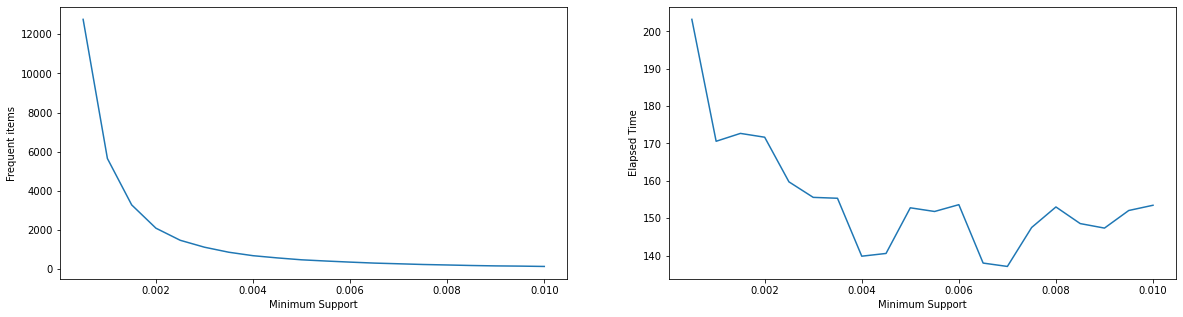

In [81]:
fig,ax = plt.subplots(1,2, figsize = (20,5))
ax = ax.flatten()
ax[0].plot(support_vals, frequent_itemsets)
ax[0].set_xlabel("Minimum Support")
ax[0].set_ylabel("Frequent items")

ax[1].plot(support_vals, elapsed_time)
ax[1].set_xlabel("Minimum Support")
ax[1].set_ylabel("Elapsed Time")

In [ ]:
# wrtie the code here
# you can insert more cells below, if needed

<h3>Coding Considerations</h3>
<p style="text-align: justify;">You must consider the following in your implementations:</p>
<ul>
<li class="a"><span> The output CSV files should be generated in the same directory of your code when you run it. Use the naming provided in the Implementation section. </span>
<li class="a"><span> You should write your code in this Jupyter Notebook (*.ipynb) file which can generate the required reports itself.</span>
<li class="a"><span> Your code should be self-explanatory. Make sure you add comments and your output files are formatted correctly. You might lose up to 30 points for bad code quality (readability, modularity, comments, efficiency, etc.) and formatting of the output files.</span></li>
</ul>

<h2>Submission</h2>
<p style="text-align: justify;">Your python file or Jupyter Notebook file must generate all the abovementioned reports when you run it.</p>
<p style="text-align: justify;">You need to submit a zip file in Canvas, including the following items: 

<ul>
<li class="a"><span> a Jupyter Notebook (*.ipynb) file, named assignment3.ipynb that contains your completed code </span>
<li class="a"><span> patterns.csv that contains the frequent patterns</span>
<li class="a"><span> maximal.csv that contains the maximal patterns</span>
<li class="a"><span> rules.csv that contains the association rules</span>
<li class="a"><span> results.pdf: a pdf file that contains all the requested charts and outputs (only copy the outputs (not the code itself) from your Notebook to this file. Also do not include the patterns and their supports in this file.)</span>
    
</li>
</ul>
    
<span style="background-color: #ffff99;">The file name should be in <strong>FirstName_LastName</strong> format</span>.</p>
<p style="text-align: justify;"><span style="background-color: #ffff99;">DO NOT INCLUDE EXTRA FILES, SUCH AS THE INPUT DATASETS</span>, in your submission;</p>
<p style="text-align: justify;">Please download your assignment after submission and make sure it is not corrupted or empty! We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.</p>

<h2>Need Help?</h2>
<p>If you need help with this assignment, please get in touch with Erfan (on MS Teams or via email at <a href="mailto:erfan.jafarikhademzavareh@ucdenver.edu">Erfan.jafarikhademzavareh@ucdenver.edu</a>) or go to his office hours.</p>
<p>&nbsp;</p>
<p>You are highly encouraged to ask your question on the designated channel for Assignment 2 on Microsoft Teams (not necessarily monitored by the instructor/TA). Feel free to help other students with general questions. However, DO NOT share your solution.</p>